In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.graph_objs as go
import math
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline

### Preprocessing

In [52]:
df = pd.read_csv('anomaly_det_dashboard_shopper_conv.csv')

In [53]:
df.head()

,totalshoppertraffic_visitors,totalshoppertraffic_visits,digital_orders,aal_orders,eup_orders,nao_orders,nse_orders,nso_orders,nsp_orders,npp_orders,total_orders,cust_prospect_ind,visit_device_type,event_dt
0,360930,386027,1024,12,5,131,444,117,66,249,1500,UNDETERMINED,All Devices,3/12/19
1,13030,14590,291,45,213,23,6,2,1,1,345,CUSTOMER,Tablet,3/12/19
2,927,943,0,0,0,0,0,0,0,0,0,UNDETERMINED,Gaming Console,3/12/19
3,251155,284929,4879,1056,3093,569,100,31,17,13,6007,CUSTOMER,All Devices,3/12/19
4,161097,180050,3820,836,2454,436,57,16,13,8,4489,CUSTOMER,Desktop,3/12/19


In [54]:
df.columns

Index(['totalshoppertraffic_visitors', 'totalshoppertraffic_visits',
       'digital_orders', 'aal_orders', 'eup_orders', 'nao_orders',
       'nse_orders', 'nso_orders', 'nsp_orders', 'npp_orders', 'total_orders',
       'cust_prospect_ind', 'visit_device_type', 'event_dt'],
      dtype='object')

In [55]:
df = df[['totalshoppertraffic_visitors','digital_orders','cust_prospect_ind','visit_device_type','event_dt']]

In [56]:
df.columns = ['visitors','orders','customer','device','date']

In [57]:
df['rate'] = df.orders/df.visitors

In [46]:
df.date = pd.to_datetime(df.date)

In [58]:
df.sort_values(by=['date'], inplace=True)

In [59]:
df = df[df.device != 'E-Reader']
df = df[df.device != 'Gaming Console']

In [60]:
df.reset_index(drop=True, inplace=True)

In [61]:
df.head()

,visitors,orders,customer,device,date,rate
0,21987,98,PROSPECT,Desktop,2/1/19,0.004457
1,158023,586,UNDETERMINED,Desktop,2/1/19,0.003708
2,79575,833,CUSTOMER,Mobile Phone,2/1/19,0.010468
3,21371,40,UNDETERMINED,Tablet,2/1/19,0.001872
4,350533,972,UNDETERMINED,All Devices,2/1/19,0.002773


In [62]:
df.describe()

,visitors,orders,rate
count,936.000000,936.000000,936.000000
mean,163884.457265,1575.767094,0.009351
std,178407.483052,2084.004884,0.007675
min,142.000000,0.000000,0.000000
25%,21454.250000,132.500000,0.003720
50%,95606.000000,506.000000,0.005766
75%,265004.000000,2415.500000,0.012562
max,835134.000000,13084.000000,0.032771


### Exploratory Analysis

In [67]:
df2 = df[(df.device!='All Devices') & (df.customer!='All Visitors')]

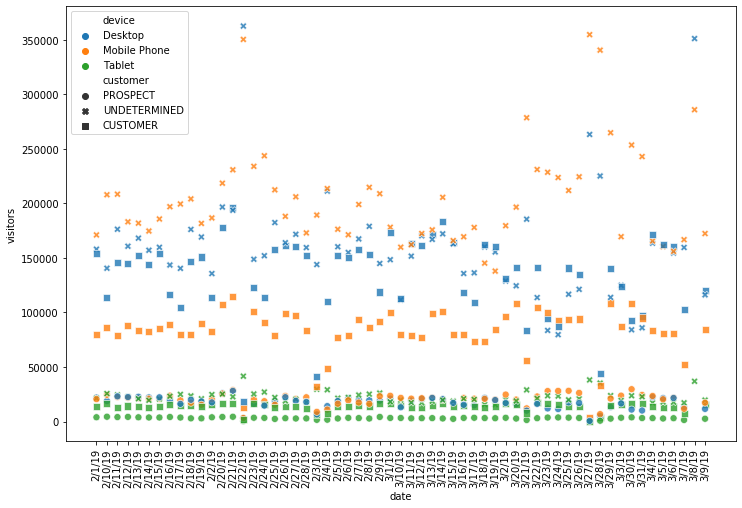

In [68]:
# visitors
fig,ax = plt.subplots(figsize=(12,8)) 
plt.xticks(rotation=90)
sns.scatterplot(x="date", y="visitors", data=df2, \
                hue='device', legend='brief', alpha=.8, style='customer', s=50)

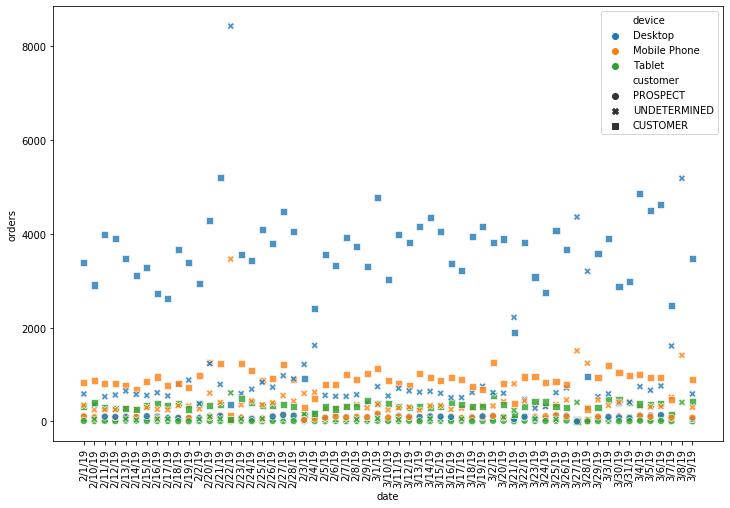

In [69]:
# orders
fig,ax = plt.subplots(figsize=(12,8)) 
plt.xticks(rotation=90)
sns.scatterplot(x="date", y="orders", data=df2, \
                hue='device', legend='brief', alpha=.8, style='customer', s=50)

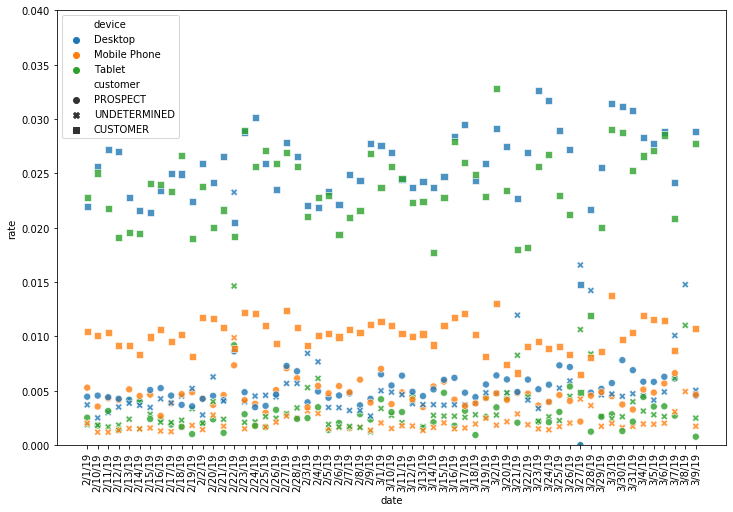

In [70]:
# rate
fig,ax = plt.subplots(figsize=(12,8)) 
plt.xticks(rotation=90)
plt.ylim(0,0.04)
sns.scatterplot(x="date", y="rate", data=df2, \
                hue='device', legend='brief', alpha=.8, style='customer', s=50)

Key takeaway: customers like to browse on phones but tend to place orders on desktops.

In [22]:
df_all = df[(df.customer=='All Visitors') & (df.device=='All Devices')]

In [26]:
# visitors
l1 = go.Scatter(x=df_all.date, y=df_all.visitors)
d = [l1]
plotly.offline.iplot({'data':d,
                      'layout':{
                          'xaxis':{'title':'Time'},
                          'yaxis':{'title':'Number of Visitors'}
                      }})

In [71]:
# orders
l1 = go.Scatter(x=df_all.date, y=df_all.orders)
d = [l1]
plotly.offline.iplot({'data':d,
                      'layout':{
                          'xaxis':{'title':'Time'},
                          'yaxis':{'title':'Number of Visitors'}
                      }})

In [72]:
# rate
l1 = go.Scatter(x=df_all.date, y=df_all.rate)
d = [l1]
plotly.offline.iplot({'data':d,
                      'layout':{
                          'xaxis':{'title':'Time'},
                          'yaxis':{'title':'Number of Visitors'}
                      }})

In [ ]:
# time series across customer types

In [44]:
df = pd.read_csv('shopper_conv.csv')
df.date = pd.to_datetime(df.date)
df = df.sort_values(by=['date'])
data = df[df.customer_type=='UNDETERMINED']
data = data[data.device_type == 'Mobile Phone']
l1 = go.Scatter(x=data.date, y=data.visitors, name='Mobile',mode='lines+markers', marker=dict(color=a))
d = [l1]



plotly.offline.iplot({'data': d, 'layout': {
    'xaxis': {'title': 'Time'},
    'yaxis': {'title': 'Number of Visitors'}}})


In [12]:
#from fbprophet import Prophet

In [2]:

# # # m = Prophet()
# # # m.fit(df.head(52))
# # future = m.make_future_dataframe(periods=7)
# # future.tail()
# forecast = m.predict(future)
# # forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [84]:
# # frame a sequence as a supervised learning problem
# def timeseries_to_supervised(data, lag=1):
#     df = DataFrame(data)
    
#     columns = [df.shift(i) for i in range(1, lag+1)]
#     columns.append(df)
#     df = concat(columns, axis=1)
#     df.fillna(0, inplace=True)
#     return df

# import tensorflow as tf

# import math

# scaler = MinMaxScaler(feature_range=(0, 1))
# data = scaler.fit_transform(data.reshape(-1, 1))

# def get_window_data(data, window):

#     # Get window data and scale

#     scaler = MinMaxScaler(feature_range=(0, 1))

#     data = scaler.fit_transform(data.reshape(-1, 1))
#     #data = data.reshape(-1,1)
#     X = []
#     y = []
#     for i in range(len(data) - window):
#         X.append(data[i : i + window])
#         y.append(data[i + window])
#     X = np.asarray(X)
#     y = np.asarray(y)
#     return X, y, scaler

# window_size = 6


# X, y, scaler = get_window_data(a.orders.values, window_size)


# test_split=46
# X_train = X[:test_split]
# X_test = X[test_split:]
# y_train = y[:test_split]
# y_test = y[test_split:]

# model = Sequential()
# model.add(LSTM(50, input_shape=(window_size, 1)))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation("linear"))
# model.compile(loss="mse", optimizer="adam")

# history = model.fit(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=1,
#     validation_data=(X_test, y_test),
#     verbose=2,
#     shuffle=False,
# )

# # plot history
# plt.figure(figsize=(6, 5), dpi=600)
# plt.plot(history.history["loss"], 'darkred', label="Train")
# plt.plot(history.history["val_loss"], 'darkblue', label="Test")
# plt.title("Loss over epoch")
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# y_pred = model.predict(X_test)

# d = np.array(a.orders).reshape(-1,1)

# k = scaler.fit_transform(d)

# y_pred = scaler.inverse_transform(y_pred)



# y_test = scaler.inverse_transform(y_test)



In [36]:
undetermined = df[df.cust_prospect_ind == 'UNDETERMINED']
prospect = df[df.cust_prospect_ind == 'PROSPECT']
customer = df[df.cust_prospect_ind == 'CUSTOMER']

In [37]:
desktop = df[df.visit_device_type=='Desktop']
mobile = df[df.visit_device_type=='Mobile Phone']
tablet = df[df.visit_device_type=='Tablet']
game = df[df.visit_device_type=='Gaming Console']
e_reader = df[df.visit_device_type=='E-Reader']

In [38]:
def plot_visitor_by_device(df):
    undetermined = df[df.cust_prospect_ind == 'UNDETERMINED']
    prospect = df[df.cust_prospect_ind == 'PROSPECT']
    customer = df[df.cust_prospect_ind == 'CUSTOMER']
    l1 = go.Scatter(x=undetermined.event_dt, y=undetermined.totalshoppertraffic_visitors, name='Undetermined')
    
    

In [39]:
def plot_visitor_by_cust(df):
    mobile = df[df.visit_device_type == 'Mobile Phone']
    tablet = df[df.visit_device_type == 'Tablet']
    desktop = df[df.visit_device_type == 'Desktop']
    gaming = df[df.visit_device_type == 'Gaming Console']
    reader = df[df.visit_device_type == 'E-Reader']
    
    l1 = go.Scatter(x=mobile.event_dt, y=mobile.totalshoppertraffic_visitors, name='Mobile')
    l2 = go.Scatter(x=tablet.event_dt, y=tablet.totalshoppertraffic_visitors, name='Tablet')
    l3 = go.Scatter(x=desktop.event_dt, y=desktop.totalshoppertraffic_visitors, name='Desktop')
    l4 = go.Scatter(x=gaming.event_dt, y=gaming.totalshoppertraffic_visitors, name='Gaming Console')
    l5 = go.Scatter(x=reader.event_dt, y=reader.totalshoppertraffic_visitors, name='E-Reader')
    
    data = [l1,l2,l3,l4,l5]
    plotly.offline.iplot({'data': data, 'layout': {
        'xaxis': {'title': 'Time'},
        'yaxis': {'title': 'Number of Visitors'}
    }})


In [40]:
plot_visitor_by_cust(undetermined)

## create csv files across cust and device

In [18]:
l = go.Scatter(x=a.Date, y=a.Visitors)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Visitors'},
    'title': '#All Visitors',
    'width': 1000,
    'height':400
}})

In [175]:
l = go.Scatter(x=a.date, y=a.orders)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Orders'},
    'title': '#All Orders',
    'width': 1000,
    'height':400
}})